In [1]:
# загрузка данных и код предобработки из части 1 анализа
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore', category=Warning)
spb_houses = pd.read_csv('Tehniko-ekonomicheskie-pasporta-mnogokvartirnyh-domov.csv', sep = ',')

df = spb_houses[['Район', 'Год постройки', 'Общая площадь здания, м2', 'Площадь жилых помещений, м2', 'Число этажей', 'Тип квартиры', 'Количество квартир', 'Порядковый номер']]
df.columns = (['region', 'year', 'square_house', 'square_flat', 'floor', 'flat_type', 'flat_cnt', 'id'])

df['year'] = df['year'].fillna('нет данных')
df['square_house'] = df['square_house'].fillna(0)
df['square_flat'] = df['square_flat'].fillna(0)
df['floor'] = df['floor'].fillna(0).astype(int)
df['flat_type'] = df['flat_type'].fillna('нет данных')
df['flat_cnt'] = df['flat_cnt'].fillna('нет данных')

years = [str(i) for i in range(1991,2024)]
srch_pat = '|'.join(year for year in years)
df['year_filter'] = df['year'].str.contains(srch_pat)
df = df.query("year_filter == True")
years_drop = ['1975,1994', '1979-1983, 1997', '1951\(лит А1\), 1954 \(лит А2\), 2001 \(лит А3\)', '1980,2013']
srch_pat_2 = '|'.join(year for year in years_drop)
df['year_filter_2'] = df['year'].str.contains(srch_pat_2)
df = df.query("year_filter_2 == False")
df['year'] = df['year'].str.split('-').str.get(0).str.split(',').str.get(0)

df['flat_cnt'] = df['flat_cnt'].str.split(',')
df['flat_type'] = df['flat_type'].str.split(',')
f_types = ['1 комн.','2 комн.','3 комн.','4 комн.','5 комн.','6 комн.','7 комн.']
for f_type in f_types:
  df[f_type] = df.apply(lambda x: x['flat_cnt'][x['flat_type'].index(f_type)] if f_type in x['flat_type'] else 0, axis = 1)
for f_type in f_types:
  df[f_type] = df[f_type].astype(int)

df = df[['region', 'year', 'square_house', 'square_flat', 'floor', 'id', '1 комн.', '2 комн.', '3 комн.', '4 комн.', '5 комн.', '6 комн.', '7 комн.']]
df.head()

,region,year,square_house,square_flat,floor,id,1 комн.,2 комн.,3 комн.,4 комн.,5 комн.,6 комн.,7 комн.
1,Пушкинский,1996,642.2,548.2,2,2,0,3,5,0,0,0,0
3,Невский,2003,6042.0,5413.4,10,4,10,31,39,0,0,0,0
7,Курортный,2008,1500.0,1485.0,3,8,0,0,0,0,0,8,0
23,Пушкинский,1995,6366.8,5340.8,5,24,26,40,27,3,0,0,0
29,Колпинский,2003,3513.4,2679.3,5,30,17,22,5,0,0,0,0


**2. Анализ и визуализация данных**

In [2]:
import matplotlib.pyplot as plt

**2.1. Распределение объемов современного жилищного строительства по районам Санкт-Петербурга**

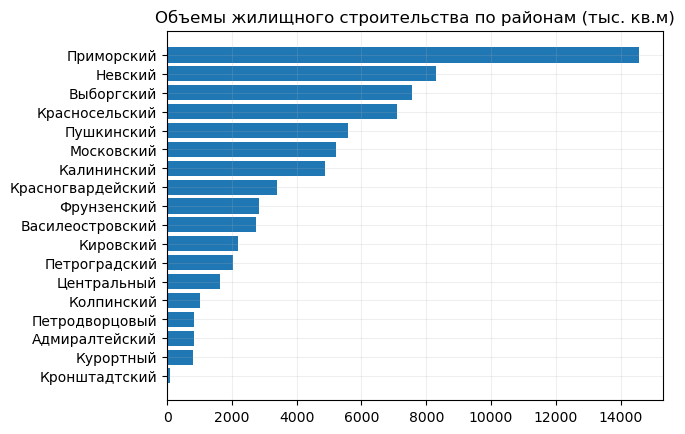

In [3]:
df_square_region = df.groupby('region').agg({'square_house': 'sum'}).reset_index()
df_square_region['square_house'] = round(df_square_region['square_house']/1000)
df_square_region = df_square_region.sort_values(by = 'square_house')
plt.barh(df_square_region['region'], df_square_region['square_house'])
plt.title('Объемы жилищного строительства по районам (тыс. кв.м)')
plt.grid(alpha=0.2);

In [4]:
df_square_region.head(18).sort_values(by = 'square_house', ascending = False)

,region,square_house
14,Приморский,14582.0
11,Невский,8289.0
2,Выборгский,7549.0
7,Красносельский,7090.0
15,Пушкинский,5592.0
10,Московский,5201.0
3,Калининский,4884.0
6,Красногвардейский,3400.0
16,Фрунзенский,2833.0
1,Василеостровский,2734.0


Абсолютным лидером по объемам жилищного строительства после 1991 года является Приморский район с суммарным показателем более 14 млн. кв.м общей площади жилых домов. Со значительным отрывом от лидера далее идут Невский, Выборгский, Красносельский районы с показателями от 8,3 до 7 млн. кв.м жилья. Далее по графику можно выделить группы Пушкинский - Московский - Калининский (5,6 - 4,9 млн. кв.м.), Красногвардейский - Фрунзенский - Василеостровский (3,4 - 2,7 млн. кв.м), Кировский - Петроградский - Центральный (2,2 - 1,6 млн. кв.м). В Колпинском районе построено около 1 млн. кв.м жилого фонда, в Петродворцовом, Адмиралтейском, Курортном около 800 тыс. кв.м. Замыкает список Кронштадский район с показателем 81 тыс. кв.м.

**2.2. Распределение объемов современного жилищного строительства по годам постройки**

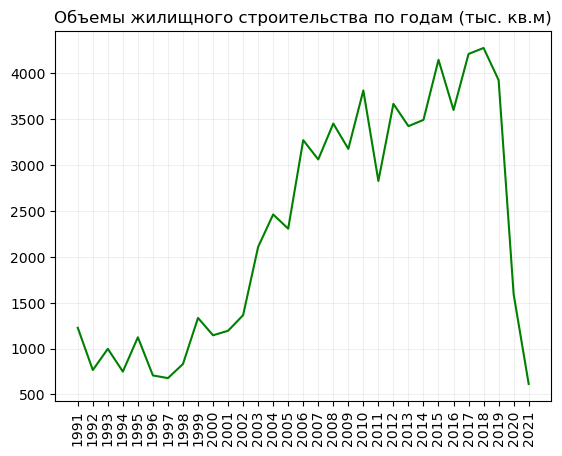

In [5]:
df_square_year = df.groupby('year').agg({'square_house': 'sum'}).reset_index()
df_square_year['square_house'] = round(df_square_year['square_house']/1000)
plt.plot(df_square_year['year'], df_square_year['square_house'], color = 'green')
plt.title('Объемы жилищного строительства по годам (тыс. кв.м)')
plt.xticks(rotation = 90)
plt.grid(alpha=0.2);

В 90-е годы наблюдается провал по вводу жилья с 1996 по 1998 гг. включительно. В 2003 году наблюдается резкий скачок показателя с менее чем 1,5 млн. до более 2 млн. кв.м. площади в год, в 2006 году аналогично с менее 2,5 млн. до более 3 млн. кв.м площад в год. Далее стабильный рост до современных показтелей в более 4 млн. кв.м в год. Скачкообразные показатели по годам, начиная с 2000-х, объясняются тем, что в эксплуатацию вводились огромные комплексные проекты развития территории, которые давали массовый единовременный прирост. Данные за 2021 год скорее всего неполные, хотя анализируется набор данных от 03.04.2023.

**2.3. Распределение объемов современного жилищного строительства по районам и годам постройки**

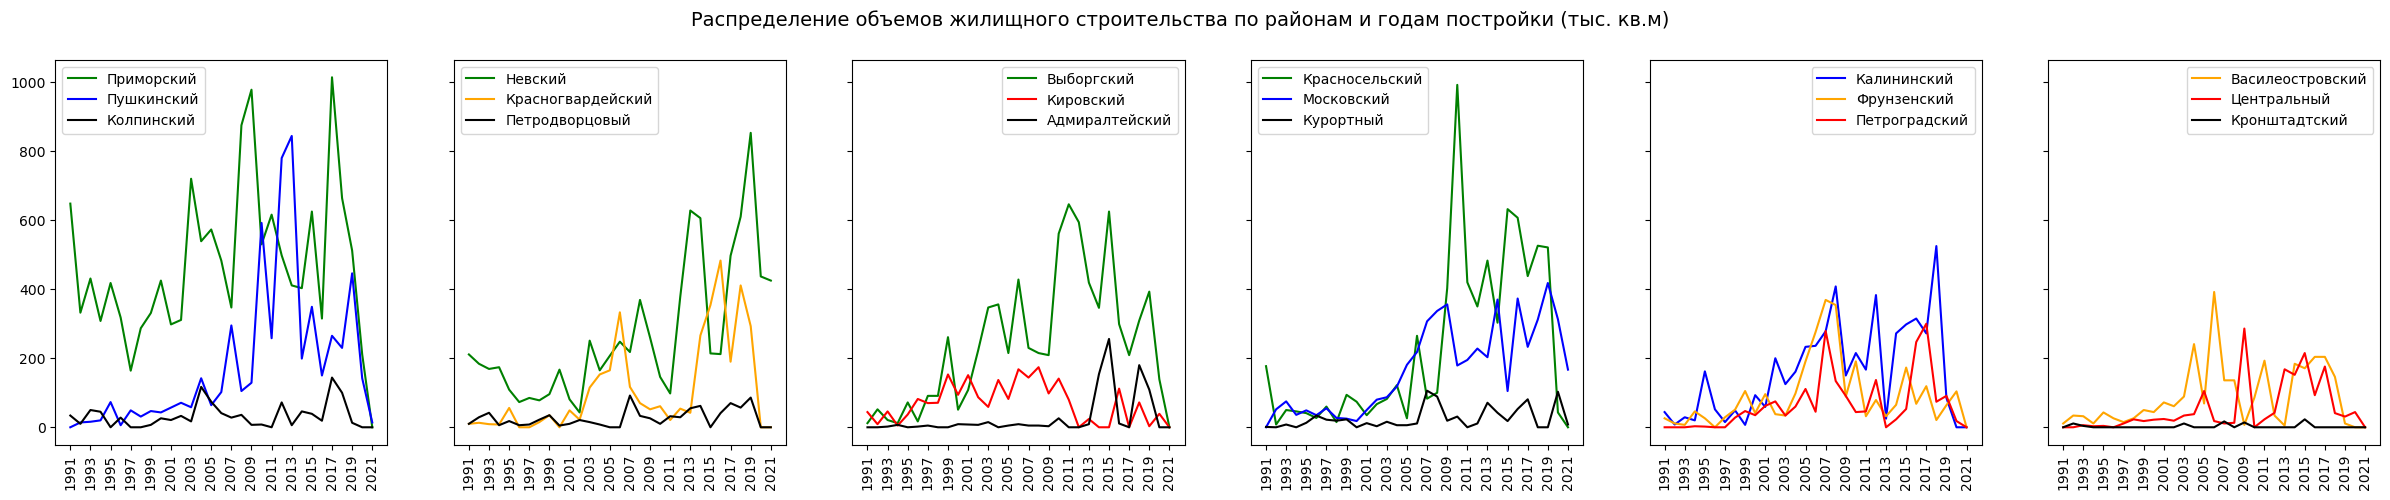

In [6]:
df_square_yr = df.groupby(['year', 'region']).agg({'square_house': 'sum'}).reset_index()
df_square_yr['square_house'] = round(df_square_yr['square_house']/1000)
df_square_yr = df_square_yr.pivot(index = 'year', columns = 'region', values = 'square_house').reset_index().fillna(0) # при трансформации в сводную таблицу записи со значениями 0 стали NaN, исправляем ситуацию

fig, ax = plt.subplots(1,6, figsize = (30,5), sharey = True)
fig.suptitle('Распределение объемов жилищного строительства по районам и годам постройки (тыс. кв.м)', fontsize = 14)
ax[0].plot(df_square_yr['year'], df_square_yr['Приморский'], color = 'green', label = 'Приморский')
ax[0].plot(df_square_yr['year'], df_square_yr['Пушкинский'], color = 'blue', label = 'Пушкинский')
ax[0].plot(df_square_yr['year'], df_square_yr['Колпинский'], color = 'black', label = 'Колпинский')
ax[0].legend()

# разрежение и поворот подписей к осям x
current_ticks = ax[0].get_xticks()
new_ticks = [x for x in current_ticks if x%2==0]
current_labels = ax[0].get_xticklabels()
new_labels = [x for i, x in enumerate(current_labels) if i%2==0]
ax[0].set_xticks(ticks=new_ticks)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

ax[1].plot(df_square_yr['year'], df_square_yr['Невский'], color = 'green', label = 'Невский')
ax[1].plot(df_square_yr['year'], df_square_yr['Красногвардейский'], color = 'orange', label = 'Красногвардейский')
ax[1].plot(df_square_yr['year'], df_square_yr['Петродворцовый'], color = 'black', label = 'Петродворцовый')
ax[1].legend()
ax[1].set_xticks(ticks=new_ticks)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

ax[2].plot(df_square_yr['year'], df_square_yr['Выборгский'], color = 'green', label = 'Выборгский')
ax[2].plot(df_square_yr['year'], df_square_yr['Кировский'], color = 'red', label = 'Кировский')
ax[2].plot(df_square_yr['year'], df_square_yr['Адмиралтейский'], color = 'black', label = 'Адмиралтейский')
ax[2].legend()
ax[2].set_xticks(ticks=new_ticks)
ax[2].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

ax[3].plot(df_square_yr['year'], df_square_yr['Красносельский'], color = 'green', label = 'Красносельский')
ax[3].plot(df_square_yr['year'], df_square_yr['Московский'], color = 'blue', label = 'Московский')
ax[3].plot(df_square_yr['year'], df_square_yr['Курортный'], color = 'black', label = 'Курортный')
ax[3].legend()
ax[3].set_xticks(ticks=new_ticks)
ax[3].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

ax[4].plot(df_square_yr['year'], df_square_yr['Калининский'], color = 'blue', label = 'Калининский')
ax[4].plot(df_square_yr['year'], df_square_yr['Фрунзенский'], color = 'orange', label = 'Фрунзенский')
ax[4].plot(df_square_yr['year'], df_square_yr['Петроградский'], color = 'red', label = 'Петроградский')
ax[4].legend()
ax[4].set_xticks(ticks=new_ticks)
ax[4].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

ax[5].plot(df_square_yr['year'], df_square_yr['Василеостровский'], color = 'orange', label = 'Василеостровский')
ax[5].plot(df_square_yr['year'], df_square_yr['Центральный'], color = 'red', label = 'Центральный')
ax[5].plot(df_square_yr['year'], df_square_yr['Кронштадтский'], color = 'black', label = 'Кронштадтский')
ax[5].legend()
ax[5].set_xticks(ticks=new_ticks)
ax[5].set_xticklabels(ax[0].get_xticklabels(),rotation=90);

По многим районам наблюдается общая для города тенденция в увеличении темпов жилого строительства с 2000-х годов. В Красносельском районе при этом отмечается взрывной пик строительства в 2010 году, когла в эксплуатацию было введено около 1 млн. кв.м жилья (период масштабной застройки в районе комплекса "Балтийская жемчужина"). Сильный скачок в увеличении темпов строительства с 2007 года наблюдался в Пушкинском районе. В Приморском районе все годы строили стабильно больше, чем в прочих районах Санкт-Петербурга.

**2.4. Средняя этажность современной жилой застройки по районам**

In [7]:
# на этапе предобработки данных мы заменяли NaN значения в поле floor на 0. проверим, есть ли они в данных, отфильтрованных по годам после 1991 г. и при их наличии удалим перед агрегацией
df['floor'].unique()
# нулевых значений нет, берем все данные в работу

array([ 2, 10,  3,  5,  4,  8, 12,  6,  7, 24,  9, 17, 13, 22, 26, 18, 28,
       15, 16, 25, 14, 11, 20, 35, 21, 27, 23, 29, 19, 30,  1, 33])

In [8]:
# посчитаем среднее и медианное значение этажности по районам
df_floor_region = df.groupby('region').agg({'floor': ['mean', 'median']}).reset_index()
df_floor_region.columns = ['region','avg_floor','median_floor']
df_floor_region.head(18)
# вывод таблицы ниже показал, что разница между средним и медианным значением невелика для районов, следовательно, застройка примерно однородна по этажности в рамках районов.
# для визуализации и выводов будем использовать медиану

,region,avg_floor,median_floor
0,Адмиралтейский,9.675000,8.0
1,Василеостровский,13.000000,13.0
2,Выборгский,13.854651,12.0
3,Калининский,16.214286,16.0
4,Кировский,12.039216,10.0
5,Колпинский,8.540230,9.0
6,Красногвардейский,15.351485,17.0
7,Красносельский,12.091743,10.0
8,Кронштадтский,9.666667,11.0
9,Курортный,6.351064,5.0


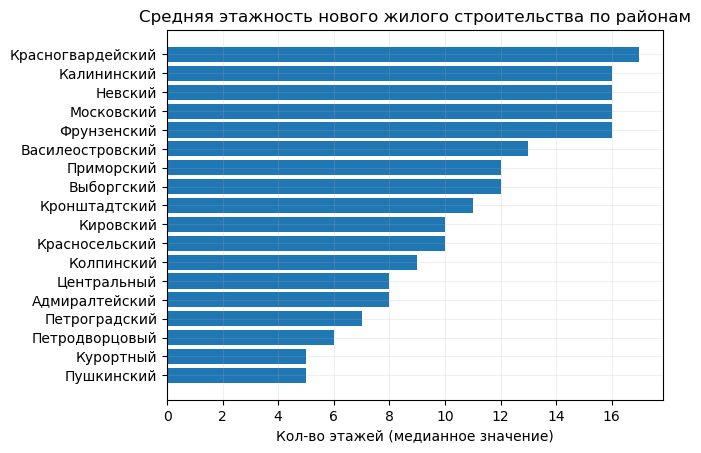

In [9]:
df_floor_region = df_floor_region.sort_values(by = 'median_floor')
plt.barh(df_floor_region['region'], df_floor_region['median_floor'])
plt.title('Средняя этажность нового жилого строительства по районам')
plt.xlabel('Кол-во этажей (медианное значение)')
plt.grid(alpha=0.2);

Приморский район на удивление оказался не в лидерах по медианному значению (да и среднему) этажности жилой застройки. Выше по количеству этажей строили жилые дома в Василеостровском, Фрунзенском, Московском, Невском, Калиниском и Красногвардейском районах. Лидер - Красногвардейский район - имеет медианный показатель в 17 этажей. Самыми малоэтажными ожидаемо оказались центральные районы города с нормативным ограничением высоты новой застройки (Центральный, Адмиралтейский, Петроградский), а также  исторический пригороды (Петродворцовый, Пушкинский) и Курортный район, где также действуют ограничения. Наличие Василеостровского района в верзхней части списка объясняется застройкой его новой, не исторической части.

**2.5. Средняя этажность современной жилой застройки по районам и по годам постройки**

In [10]:
# тоже будем оценивать медианные значения
df_floor_yr = df.groupby(['year','region']).agg({'floor': 'median'}).reset_index()
df_floor_yr.columns = ['year','region','median_floor']
df_floor_yr = df_floor_yr.pivot(index = 'year', columns = 'region', values = 'median_floor').reset_index().fillna(0) # при трансформации в сводную таблицу записи со значениями 0 стали NaN, исправляем ситуацию

In [11]:
df['region'].unique()

array(['Пушкинский', 'Невский', 'Курортный', 'Колпинский',
       'Красносельский', 'Выборгский', 'Приморский', 'Василеостровский',
       'Красногвардейский', 'Центральный', 'Петроградский',
       'Адмиралтейский', 'Фрунзенский', 'Московский', 'Кировский',
       'Калининский', 'Петродворцовый', 'Кронштадтский'], dtype=object)

In [12]:
regions = ['Пушкинский', 'Невский', 'Курортный', 'Колпинский',
       'Красносельский', 'Выборгский', 'Приморский', 'Василеостровский',
       'Красногвардейский', 'Центральный', 'Петроградский',
       'Адмиралтейский', 'Фрунзенский', 'Московский', 'Кировский',
       'Калининский', 'Петродворцовый', 'Кронштадтский']
for region in regions:
  df_floor_yr[region] = df_floor_yr[region].astype(int)
df_floor_yr.style.background_gradient(cmap='Blues', axis = None) # применили условное форматирование к таблице

region,year,Адмиралтейский,Василеостровский,Выборгский,Калининский,Кировский,Колпинский,Красногвардейский,Красносельский,Кронштадтский,Курортный,Московский,Невский,Петроградский,Петродворцовый,Приморский,Пушкинский,Фрунзенский,Центральный
0,1991,0,6,10,14,9,10,7,10,0,5,0,12,0,14,10,0,10,0
1,1992,0,17,10,10,10,10,5,10,11,0,5,11,0,11,12,5,8,0
2,1993,5,19,12,9,8,9,6,12,7,10,10,11,0,7,12,3,16,6
3,1994,5,13,7,13,10,5,9,10,0,0,16,10,8,9,12,2,10,4
4,1995,0,12,8,10,10,0,14,5,0,11,13,11,6,5,12,4,5,7
5,1996,4,16,13,10,17,9,0,10,0,9,5,16,0,6,11,2,0,0
6,1997,4,8,9,6,10,0,0,16,0,6,9,15,0,9,14,2,13,6
7,1998,0,16,10,13,10,0,5,7,0,8,12,12,8,9,13,4,10,7
8,1999,0,14,10,5,10,9,10,9,0,9,10,10,6,6,10,4,10,6
9,2000,6,13,10,12,10,4,0,4,0,0,9,10,8,7,10,4,13,7


Начиная с 2005 года медианное значение этажности застройки в периферийных районах, где не действуют ограничения высотности строительства, начало увеличиваться, перевалив за 15, а потом и за 20 этажей. В 2008 году появляется первая запись в таблице с медианным значением в 20 этажей для Выборгского района, далее это число растет, как и число районов с этажностью выше 20 этажей. В 2020 - 2021 гг. наблюдается тенденция к снижению этого показателя, что связано с понижением максимально допустимой высотности на новую застройку на всей территории города.

**2.6. Квартирография современной жилой застройки по районам (распределение квартир по количеству комнат)**

In [13]:
df_rooms = df.groupby('region').agg({'1 комн.': 'sum', '2 комн.': 'sum', '3 комн.': 'sum', '4 комн.': 'sum', '5 комн.': 'sum', '6 комн.': 'sum', '7 комн.': 'sum'}).reset_index()
df_rooms.head(18)
# первый взгляд на таблицу выявляет подозрительные значения количества семикомнатных квартир в Красногвардейском и Московском районах

,region,1 комн.,2 комн.,3 комн.,4 комн.,5 комн.,6 комн.,7 комн.
0,Адмиралтейский,5183,2696,1637,87,13,1,1
1,Василеостровский,12028,7205,5355,2341,136,47,18
2,Выборгский,47496,25334,19779,1946,363,46,31
3,Калининский,36650,18624,10612,906,73,11,5
4,Кировский,10820,9013,6704,600,88,22,16
5,Колпинский,6778,4993,2756,179,24,3,2
6,Красногвардейский,24355,13492,6833,1074,113,12,1874
7,Красносельский,55135,25985,15936,1916,148,3,1
8,Кронштадтский,474,306,180,55,2,0,0
9,Курортный,4446,3022,1961,152,26,68,3


In [14]:
# посмотри внимательно на данные, отберем дома в Московском и Красногвардейском районах, в которых есть 7-комнатные квартиры
df[((df['region'] == 'Красногвардейский') & (df['7 комн.'] != 0)) | ((df['region'] == 'Московский') & (df['7 комн.'] != 0))]
# выводимая таблица очень подозрительна, много домов с огромным количеством только 7-комнатных квартир

,region,year,square_house,square_flat,floor,id,1 комн.,2 комн.,3 комн.,4 комн.,5 комн.,6 комн.,7 комн.
495,Московский,2007,7232.0,6643.7,8,496,0,0,0,0,0,0,49
1170,Красногвардейский,2003,58053.2,35419.4,12,1171,167,113,74,49,7,4,1
3448,Московский,2003,11549.0,9671.0,14,3449,0,0,0,0,0,0,154
3449,Московский,2004,23442.0,19275.0,22,3450,0,0,0,0,0,0,184
3565,Московский,2008,5667.0,4607.0,17,3566,0,0,0,0,0,0,45
4337,Красногвардейский,2006,39406.2,31896.0,17,4338,0,0,0,0,0,0,489
4817,Красногвардейский,2015,38519.0,29190.2,18,4818,322,119,119,0,0,0,1
5069,Московский,2001,27593.0,27493.0,17,5070,0,0,0,0,0,0,436
5403,Красногвардейский,1992,3776.1,3102.0,9,5404,0,0,0,0,0,0,72
5667,Московский,2009,12056.0,9971.0,14,5668,0,0,0,0,0,0,154


In [15]:
# попробуем разобраться, в чем дело. загрузим изначальный датафрейм из части 1 Анализа (предобработка данных) и посмотрим на конкретные дома
spb_houses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Аналитика жилой фонд/Tehniko-ekonomicheskie-pasporta-mnogokvartirnyh-domov.csv', sep = ',')
pd.set_option('display.max_columns', None)
spb_houses[spb_houses['Порядковый номер'].isin([3449, 4338, 10382, 22643])] # id Из датафрейма df соответствует столбцу "Порядковый номер" в исходном датафрейме
# Мы взяли четыре записи для домов, в которых зарегистрированы сотни 7-комнатных квартир и 0 квартир других типов комнатности.
# Судя по всему, в исходных данных закралась ошибка, так как Значение общего количества комнат в квартирах не бьется с количеством 7-комнатных квартир.

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Аналитика жилой фонд/Tehniko-ekonomicheskie-pasporta-mnogokvartirnyh-domov.csv'

In [ ]:
# посмотрим повнимательнее на дома, где зарегистрированы только 7-комнатные квартиры, и примем решение о том, как их учитывать в анализе
df_strange_7 = df[(df['7 комн.'] != 0) & (df['1 комн.'] == 0) & (df['2 комн.'] == 0) & (df['3 комн.'] == 0) & (df['4 комн.'] == 0) & (df['5 комн.'] == 0) & (df['6 комн.'] == 0)]
df_strange_7.shape[0]
# таких записей 36

In [ ]:
# выведем все эти записи, отсортированные по возрастанию общей площади здания.
# делаем это для того, чтобы понять, есть ли в данных дома типа "7-комнатный таунхаус" и быть "правильными". такие дома должны иметь небольшую общую площадь и этажность до 4 этажей
df_strange_7.sort_values(by = 'square_house').head(36)
# видим пару кандидатов в Пушкинском районе на верхних строчках

In [ ]:
spb_houses[spb_houses['Порядковый номер'].isin([6949, 19384])] # ищем их в большой исходной таблице
# судя по исходной таблице, комнат больше, чем квартир в 7 (и более раз), так что данные могут быть верными.
# находим дома на карте по адресу и убеждаемся, что они вполне похожи на коттеджный тип и могут иметь 7-комнатные квартиры

In [ ]:
# сделаем проверку на параметр "кол-во комнат" / "кол-во квартир" для всех домов из датафрейма df_strange_7. если данные верные, то параметр должен быть не менее 7
id_strange_7 = df_strange_7['id'].to_list()
strange_houses = spb_houses[spb_houses['Порядковый номер'].isin(id_strange_7)]
strange_houses['alarm'] = strange_houses['Общее количество комнат в не коммунальных квартирах'].astype(int) / strange_houses['Количество квартир'].astype(int) # столбец для проверки
strange_houses.sort_values(by = 'alarm', ascending = False).head()
# убедились, что под правильные данные подходят только два дома в Пушкинском районе. принимаем решение удалить все все остальные строки из датафрейма df_strange_7

In [16]:
# удалем записи с id из списка id_strange_7, кроме двух домов из Пушкинского района
id_drop = id_strange_7.copy()
id_drop.remove(6949)
id_drop.remove(19384)

df_rooms = df[df['id'].isin(id_drop) == False].groupby('region').agg({'1 комн.': 'sum', '2 комн.': 'sum', '3 комн.': 'sum', '4 комн.': 'sum', '5 комн.': 'sum', '6 комн.': 'sum', '7 комн.': 'sum'}).reset_index()
df_rooms.head(18)

NameError: name 'id_strange_7' is not defined

In [17]:
# агрегируем для анализа 5-6-7-комнатные квартиры в один столбец
df_rooms['5 комн. и более'] = df_rooms['5 комн.'] + df_rooms['6 комн.'] + df_rooms['7 комн.']
df_rooms['summ'] = df_rooms['1 комн.'] + df_rooms['2 комн.'] + df_rooms['3 комн.'] + df_rooms['4 комн.'] + df_rooms['5 комн.'] + df_rooms['6 комн.'] + df_rooms['7 комн.']
df_rooms = df_rooms.sort_values(by = 'summ')

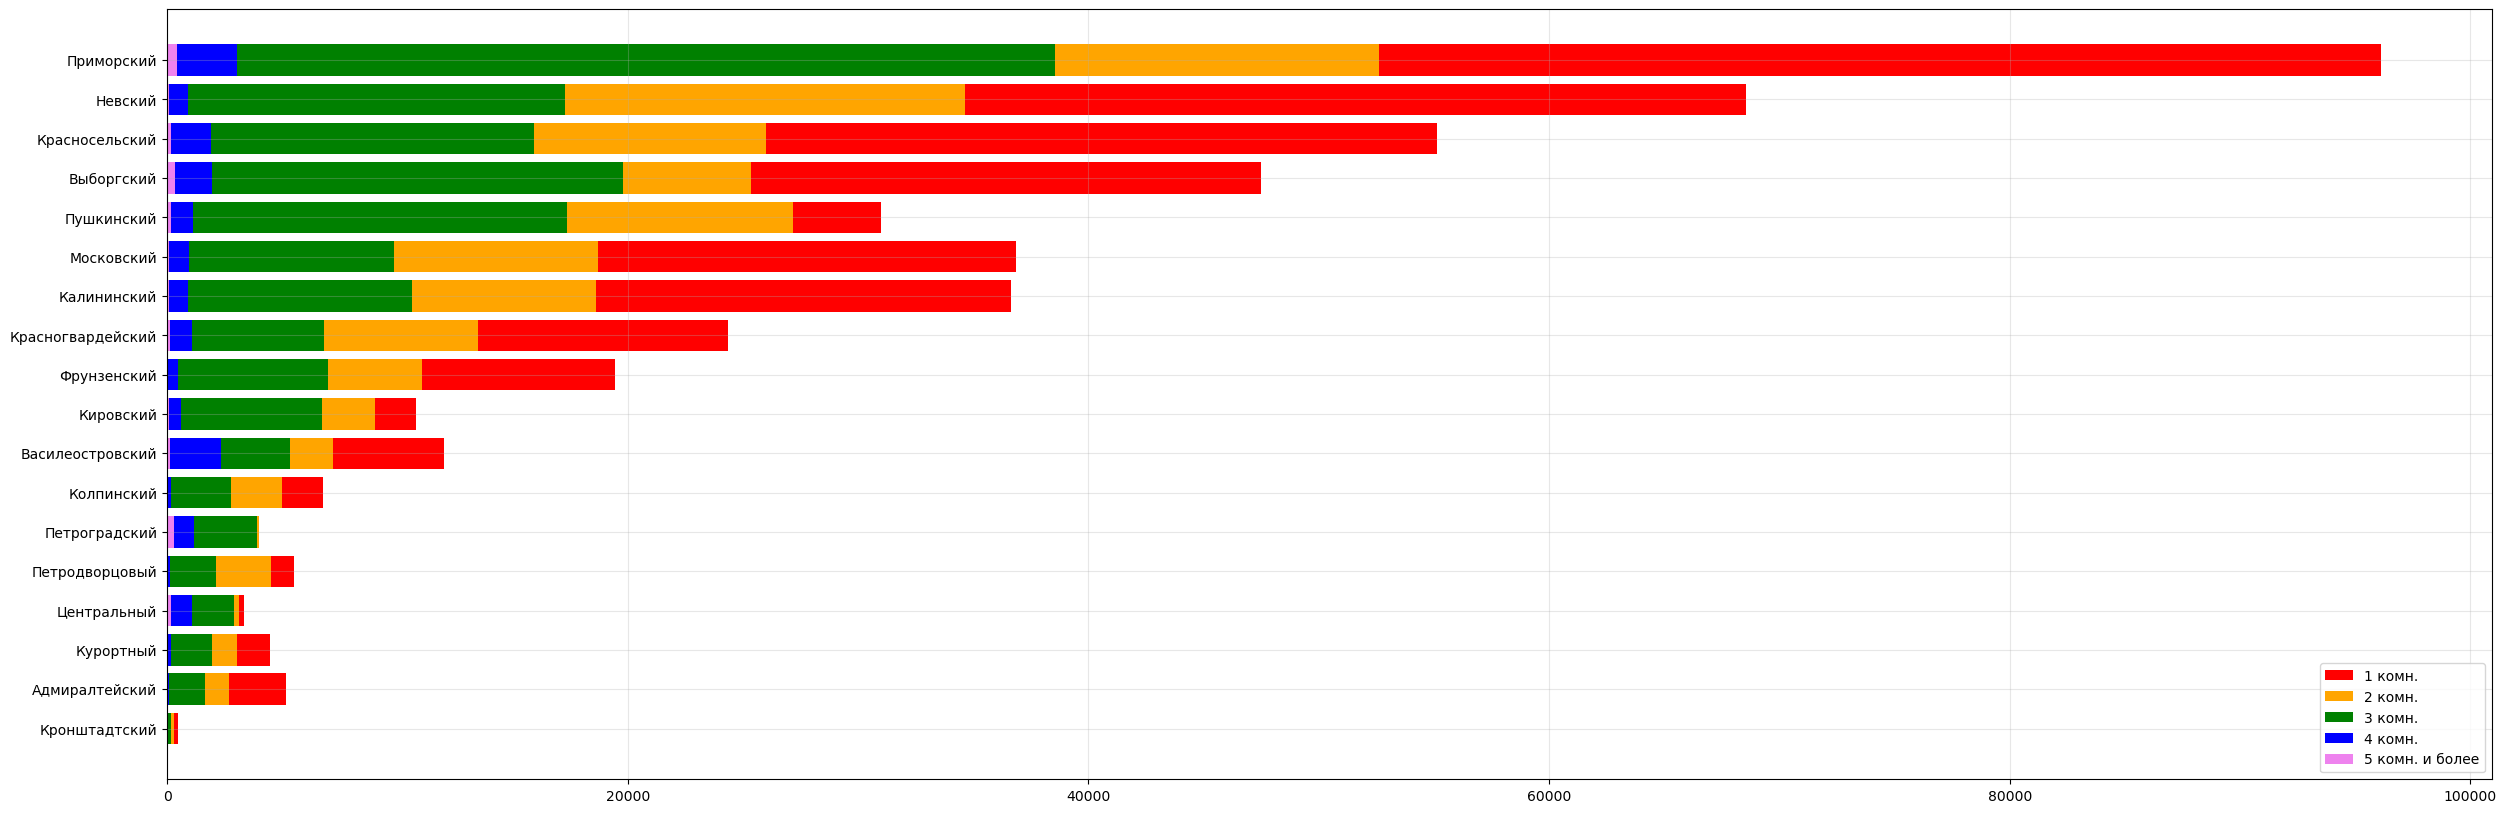

In [18]:
# делаем визуализацию
fix, ax = plt.subplots(figsize = (30,10))
ax.barh(df_rooms['region'], df_rooms['1 комн.'], color = 'red', label = '1 комн.')
ax.barh(df_rooms['region'], df_rooms['2 комн.'], color = 'orange', label = '2 комн.')
ax.barh(df_rooms['region'], df_rooms['3 комн.'], color = 'green', label = '3 комн.')
ax.barh(df_rooms['region'], df_rooms['4 комн.'], color = 'blue', label = '4 комн.')
ax.barh(df_rooms['region'], df_rooms['5 комн.'], color = 'violet', label = '5 комн. и более')
ax.legend()
ax.grid(alpha = 0.3);

В классических "спальных" районах большая часть квартир в новом жилом фонде - однокомнатные (сюда же входят и студии): Приморский, Невский, Красносельский, Выборгский, Калининский, Красногвардейский, Фрунзенский. Преобладают однокомнатные квартиры также в Московском, Василеостровском, Адмиралтейском районах. На втором месте по количеству построенных квартир в этих районах неожиданно идут трехкомнатные квартиры. Многокомнатные (в основном трехкомнатные) квартиры преобладают в профиле застройки Пушкинского, Кировского, Колпинского, Петроградского, Петродворцового, Центрального, Курортного и Адмиралтейского районов. В основном это центральные и пригородные районы города, выбивается из этого ряда только Кировский район.